# Decision Tree Classifier

In [34]:
# Importacion de librerias
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [35]:
#Lectura del dataset
columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# Se hace la division de las columnas para poder obtener los datos necesarios para hacer el entrenamiento y las pruebas
columnas = ["sepal length","sepal width","petal length","petal width"]
X = df[columnas]
Y = df['class']
print(Y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns

In [37]:
#Aplicando la separacion de los datos para el test, el train y la validacion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test

## Arbol numero 1

In [38]:
#Se crea el arbol de decision donde se puede hacer modificaciones para los parametros
myTree = tree.DecisionTreeClassifier(criterion="entropy")
#Se entrena el Decision Tree Classifier
myTree.fit(X_train, Y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
Y_pred = myTree.predict(X_test)

In [39]:
#Aqui se puede visualizar el arbol creado pero en forma de texto
print(tree.export_text(myTree))

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



[Text(0.4, 0.9166666666666666, 'x[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\nentropy =

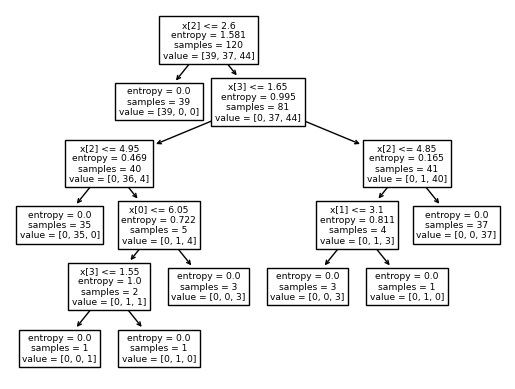

In [40]:
#Aqui se puede visualizar el arbol creado pero en forma de grafico
tree.plot_tree(myTree)

## Arbol numero 2

In [41]:
myTree2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=2)
myTree2.fit(X_train, Y_train)
print(tree.export_text(myTree2))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.65
|   |   |--- class: Iris-virginica



[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

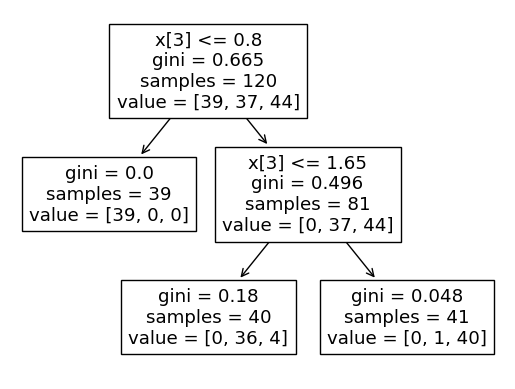

In [42]:
tree.plot_tree(myTree2)

## Arbol numero 3

In [43]:
myTree3 = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4)
myTree3.fit(X_train, Y_train)
print(tree.export_text(myTree3))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.3, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

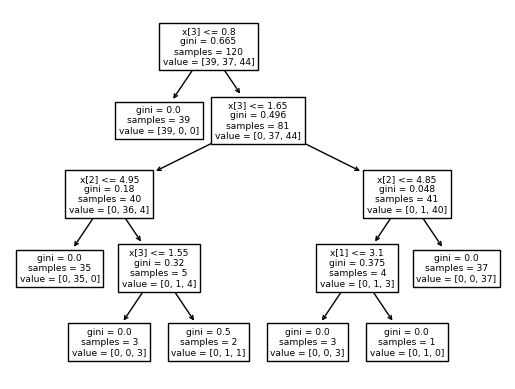

In [44]:
tree.plot_tree(myTree3)

## Pruebas para verificar los modelos creados y modificados de los parametros

In [45]:
print("Resultado de score del primer arbol 'myTree' ", myTree.score(X_test, Y_test))
print("Resultado de score del segundo arbol 'myTree2' ", myTree2.score(X_test, Y_test))
print("Resultado de score del tercer arbol 'myTree3' ", myTree3.score(X_test, Y_test))

Resultado de score del primer arbol 'myTree'  0.9666666666666667
Resultado de score del segundo arbol 'myTree2'  0.9666666666666667
Resultado de score del tercer arbol 'myTree3'  0.9666666666666667
